In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix
%matplotlib inline 

In [2]:
class Neural_Network:
    def __init__(self,X,y,num_of_neurons) -> None:
        self.X = X
        self.y = y
        self.num_of_neurons = num_of_neurons
        #weights
        np.random.seed(1)
        self.w1 = np.random.rand(num_of_neurons,X.shape[1])
        np.random.seed(1)
        self.w2 = np.random.rand(num_of_neurons,num_of_neurons)
        np.random.seed(1)
        self.w3 = np.random.rand(1,num_of_neurons)
        
        #biases
        np.random.seed(1)
        self.b1 = np.random.rand(num_of_neurons,1)
        np.random.seed(1)
        self.b2 = np.random.rand(num_of_neurons,1)
        np.random.seed(1)
        self.b3 = np.random.rand(1,1)
        self.m = self.X.shape[1]
        
        #RMSProp
        self.s1 = np.array(np.zeros(self.w1.shape))
        self.s2 = np.array(np.zeros(self.w2.shape))
        self.s3 = np.array(np.zeros(self.w3.shape))
        self.s1_b1 = np.array(np.zeros(self.b1.shape))
        self.s2_b2 = np.array(np.zeros(self.b2.shape))
        self.s3_b3 = np.array(np.zeros(self.b3.shape))
        
        #momentum
        self.v1 = np.array(np.zeros(self.w1.shape))
        self.v2 = np.array(np.zeros(self.w2.shape))
        self.v3 = np.array(np.zeros(self.w3.shape))
        self.v_b1 = np.array(np.zeros(self.b1.shape))
        self.v_b2 = np.array(np.zeros(self.b2.shape))
        self.v_b3 = np.array(np.zeros(self.b3.shape))

    def Error_with_l2(self,a2,y):
        m = y.shape[1]
        y = np.array(y)
        a2 = np.array(a2)
        cost = -(1/m)*np.sum(y*np.log(a2))
        L2_regularization_cost = (0.7/(2*m))*  (  np.sum(np.square(self.w1)) + np.sum(np.square(self.w2)) + np.sum(np.square(self.w3)))
        cost = cost + L2_regularization_cost
        return cost


    def Error(self,a2, y):
        m = y.shape[1]
        y = np.array(y)
        a2 = np.array(a2)
        cost = -(1/m)*np.sum(y*np.log(a2))
        return cost
    
    def softmax(self,Z):
        A = np.exp(Z) / np.sum(np.exp(Z))
        return A

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self,x):
        return np.tanh(x)

    def relu(self,x):
        return np.maximum(x, 0)

    def softmax(self,x):
        expX = np.exp(x)
        return expX/np.sum(expX, axis = 0)
    
    def tanh_derivative(self,z):
        return 1 - np.power(z,2)

    def forward(self):
        self.a1 = np.dot(self.w1,self.X.T)+self.b1
        self.a1 = self.tanh(self.a1)
        self.a2 = np.dot(self.w2,self.a1)+self.b2
        self.a2 = self.tanh(self.a2)
        self.a3 = np.dot(self.w3,self.a2)+self.b3
        self.a3 = self.sigmoid(self.a3)

    
    def fit(self,alpha,regularization=False,optimezer=''):
        d_z3 = self.a3 - self.y
        d_w3 = (np.dot(d_z3,self.a2.T))/self.m
        d_b3 = np.sum((d_z3)/self.m)

        d_z2 = np.array(np.dot(self.w3.T,d_z3))*np.array(self.tanh_derivative(self.a2))
        d_w2 = (np.dot(d_z2,self.a1.T))/self.m
        d_b2 = np.sum((d_z2)/self.m)
        
        d_z1 = np.dot(self.w2.T,np.array(d_z2)*np.array(self.tanh_derivative(self.a1)))
        d_w1 = (np.dot(d_z1,self.X))/self.m
        d_b1 = np.sum((d_z1)/self.m)

        if optimezer=='RMSProp':
            self.s1 = 0.999*self.s1+(1-0.999)*np.power(d_w1,2)
            self.s2 = 0.999*self.s2+(1-0.999)*np.power(d_w2,2)
            self.s3 = 0.999*self.s3+(1-0.999)*np.power(d_w3,2)
            self.s1_b1 = 0.999*self.s1_b1+(1-0.999)*np.power(d_b1,2)
            self.s2_b2 = 0.999*self.s2_b2+(1-0.999)*np.power(d_b2,2)
            self.s3_b3 = 0.999*self.s3_b3+(1-0.999)*np.power(d_b3,2)

            d_w3 = (d_w3)/np.sqrt(self.s3)+0.000000001
            d_b3 = (d_b3)/np.sqrt(self.s3_b3)+0.000000001
            d_w2 = (d_w2)/np.sqrt(self.s2)+0.000000001
            d_b2 = (d_b2)/np.sqrt(self.s2_b2)+0.000000001
            d_w1 = (d_w1)/np.sqrt(self.s1)+0.000000001
            d_b1 = (d_b1)/np.sqrt(self.s1_b1)+0.000000001

        if optimezer=='adam':
            self.s1 = 0.999*self.s1+(1-0.999)*np.power(d_w1,2)
            self.s2 = 0.999*self.s2+(1-0.999)*np.power(d_w2,2)
            self.s3 = 0.999*self.s3+(1-0.999)*np.power(d_w3,2)
            self.s1_b1 = 0.999*self.s1_b1+(1-0.999)*np.power(d_b1,2)
            self.s2_b2 = 0.999*self.s2_b2+(1-0.999)*np.power(d_b2,2)
            self.s3_b3 = 0.999*self.s3_b3+(1-0.999)*np.power(d_b3,2)
            
            self.v1 = 0.9*self.v1+d_w1
            self.v2 = 0.9*self.v2+d_w2
            self.v3 = 0.9*self.v3+d_w3
            self.v_b1 = 0.9*self.v_b1+d_b1
            self.v_b2 = 0.9*self.v_b2+d_b2
            self.v_b3 = 0.9*self.v_b3+d_b3
            
            d_w3 = (self.v3)/np.sqrt(self.s3)+0.000000001
            d_b3 = (self.v_b3)/np.sqrt(self.s3_b3)+0.000000001
            d_w2 = (self.v2)/np.sqrt(self.s2)+0.000000001
            d_b2 = (self.v_b2)/np.sqrt(self.s2_b2)+0.000000001
            d_w1 = (self.v1)/np.sqrt(self.s1)+0.000000001
            d_b1 = (self.v_b1)/np.sqrt(self.s1_b1)+0.000000001

        if regularization:
            d_w3 += (0.7*self.w3)/self.m
            d_b3 += (0.7*self.b3)/self.m

            d_w2 += (0.7*self.w2)/self.m
            d_b2 += (0.7*self.b2)/self.m

            d_w1 += (0.7*self.w1)/self.m
            d_b1 += (0.7*self.b1)/self.m

        self.w3 -= alpha*d_w3
        self.b3 -= alpha*d_b3
        self.w2 -= alpha*d_w2
        self.b2 -= alpha*d_b2
        self.w1 -= alpha*d_w1
        self.b1 -= alpha*d_b1


    def predict(self,x):
        a1 = np.dot(self.w1,x.T)+self.b1
        a1 = self.relu(a1)
        a2 = np.dot(self.w2,a1)+self.b2
        a2 = self.relu(a2)
        a3 = np.dot(self.w3,a2)+self.b3
        a3 = self.sigmoid(a3)
        return a3

In [3]:
def data_normalize(data):
        return ((data-data.mean())/data.std()).round(4)

data = pd.read_csv('Social_Network_Ads.csv')
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
x = data_normalize(x)
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.7)

epoche 0 ,loss = 0.8733117616484042  ,acc = 80.0%
epoche 1000 ,loss = 2.2101201133802597  ,acc = 96.67%
epoche 2000 ,loss = 1.5033274800223118  ,acc = 93.33%
epoche 3000 ,loss = 1.1874473867970976  ,acc = 93.33%
epoche 4000 ,loss = 1.2202820971879322  ,acc = 96.67%
epoche 5000 ,loss = 1.1850724063085099  ,acc = 96.67%
epoche 6000 ,loss = 1.3964594455426689  ,acc = 96.67%
epoche 7000 ,loss = 1.4247838673963302  ,acc = 96.67%
epoche 8000 ,loss = 1.4618959278320642  ,acc = 96.67%
epoche 9000 ,loss = 1.6924391843006528  ,acc = 96.67%
1.9613200606554435


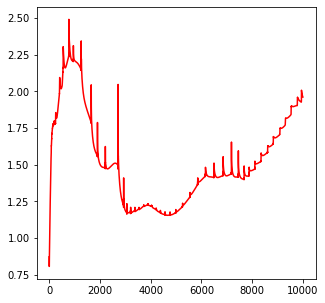

test acc = 84.06%


In [5]:

x_t = np.matrix(x_train)
y_t = np.matrix(y_train).T
nn = Neural_Network(x_t,y_t,10)

cost = []
iters = 10000
for i in range(iters):
    nn.forward()
    nn.fit(alpha=0.01,regularization=True,optimezer='RMSProp')
    hx = nn.predict(x_train)

    error = nn.Error_with_l2(hx,y_t)
    cost.append(error)
    
    if i % 1000==0 :
        mm=np.around(hx,3)
        lstt = [1 if i > 0.7 else 0 for i in mm[0]]
        mm = np.matrix([lstt],dtype=np.int64)
        cm = confusion_matrix(y_train,mm.T)
        ac = (cm[0][0]+cm[1][1])/(len(y_train))
        print(f'epoche {i} ,loss = {error}  ,acc = {np.round(ac*100,2)}%')

print(error)
hx = np.round(hx,3)
cost = np.array(cost) 

# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters),cost,'r')
plt.show()

h = nn.predict(x_test)
h=np.around(h,3)
lst = [1 if i > 0.7 else 0 for i in h[0]]
h = np.matrix([lst],dtype=np.int64)
cm = confusion_matrix(y_test,h.T)
#calculating accuracy
ac = (cm[0][0]+cm[1][1])/(len(y_test))
print(f'test acc = {np.round(ac*100,2)}%')